# Importing Libraries

In [63]:
import os
import pandas as pd
import numpy as np
from scipy import stats
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib import rcParams
plt.style.use('ggplot')
plt.rcParams.update({'font.size': 16})
plt.rcParams['grid.color'] = 'lightgrey'
plt.rcParams['figure.figsize'] = (20,8)
plt.rcParams['savefig.dpi'] = 300
plt.rcParams['axes.facecolor'] = 'white'

# Loading the dataset

In [2]:
automobile = pd.read_csv('/Users/marwahfaraj/Desktop/dsi_galvanize/project/Exploratory_Data_Analysing_using_Python_for_Automobile/Automobile_data.csv')
automobile.head(50)

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.00,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.00,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.00,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.4,10.00,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.4,8.00,115,5500,18,22,17450
5,2,?,audi,gas,std,two,sedan,fwd,front,99.8,...,136,mpfi,3.19,3.4,8.50,110,5500,19,25,15250
6,1,158,audi,gas,std,four,sedan,fwd,front,105.8,...,136,mpfi,3.19,3.4,8.50,110,5500,19,25,17710
7,1,?,audi,gas,std,four,wagon,fwd,front,105.8,...,136,mpfi,3.19,3.4,8.50,110,5500,19,25,18920
8,1,158,audi,gas,turbo,four,sedan,fwd,front,105.8,...,131,mpfi,3.13,3.4,8.30,140,5500,17,20,23875
9,0,?,audi,gas,turbo,two,hatchback,4wd,front,99.5,...,131,mpfi,3.13,3.4,7.00,160,5500,16,22,?


# Read the dataset

# listing the data coloumns

In [3]:
automobile.columns

Index(['symboling', 'normalized-losses', 'make', 'fuel-type', 'aspiration',
       'num-of-doors', 'body-style', 'drive-wheels', 'engine-location',
       'wheel-base', 'length', 'width', 'height', 'curb-weight', 'engine-type',
       'num-of-cylinders', 'engine-size', 'fuel-system', 'bore', 'stroke',
       'compression-ratio', 'horsepower', 'peak-rpm', 'city-mpg',
       'highway-mpg', 'price'],
      dtype='object')

# showing the data set information

In [4]:
automobile.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          205 non-null    int64  
 1   normalized-losses  205 non-null    object 
 2   make               205 non-null    object 
 3   fuel-type          205 non-null    object 
 4   aspiration         205 non-null    object 
 5   num-of-doors       205 non-null    object 
 6   body-style         205 non-null    object 
 7   drive-wheels       205 non-null    object 
 8   engine-location    205 non-null    object 
 9   wheel-base         205 non-null    float64
 10  length             205 non-null    float64
 11  width              205 non-null    float64
 12  height             205 non-null    float64
 13  curb-weight        205 non-null    int64  
 14  engine-type        205 non-null    object 
 15  num-of-cylinders   205 non-null    object 
 16  engine-size        205 non

# showing the statstics of the data set

In [5]:
automobile.describe().round(2).T

,count,mean,std,min,25%,50%,75%,max
symboling,205.0,0.83,1.25,-2.0,0.0,1.0,2.0,3.0
wheel-base,205.0,98.76,6.02,86.6,94.5,97.0,102.4,120.9
length,205.0,174.05,12.34,141.1,166.3,173.2,183.1,208.1
width,205.0,65.91,2.15,60.3,64.1,65.5,66.9,72.3
height,205.0,53.72,2.44,47.8,52.0,54.1,55.5,59.8
curb-weight,205.0,2555.57,520.68,1488.0,2145.0,2414.0,2935.0,4066.0
engine-size,205.0,126.91,41.64,61.0,97.0,120.0,141.0,326.0
compression-ratio,205.0,10.14,3.97,7.0,8.6,9.0,9.4,23.0
city-mpg,205.0,25.22,6.54,13.0,19.0,24.0,30.0,49.0
highway-mpg,205.0,30.75,6.89,16.0,25.0,30.0,34.0,54.0


# Cleaning the data

After descibing the data I found some coloumn is missing

In [6]:
automobile.isnull().any()

symboling            False
normalized-losses    False
make                 False
fuel-type            False
aspiration           False
num-of-doors         False
body-style           False
drive-wheels         False
engine-location      False
wheel-base           False
length               False
width                False
height               False
curb-weight          False
engine-type          False
num-of-cylinders     False
engine-size          False
fuel-system          False
bore                 False
stroke               False
compression-ratio    False
horsepower           False
peak-rpm             False
city-mpg             False
highway-mpg          False
price                False
dtype: bool

After checking null values it appers that there is no null value but why some columns still missing

# Targeting the coloumns 


targeting 'normalized-losses' cloumn and found '?' in it

In [7]:
automobile['normalized-losses'].value_counts()

?      41
161    11
91      8
150     7
134     6
104     6
128     6
94      5
103     5
95      5
102     5
65      5
85      5
168     5
74      5
118     4
122     4
106     4
93      4
148     4
101     3
125     3
115     3
137     3
154     3
83      3
129     2
87      2
194     2
108     2
197     2
153     2
113     2
158     2
119     2
164     2
89      2
81      2
110     2
192     2
188     2
145     2
77      1
142     1
98      1
78      1
90      1
186     1
231     1
107     1
121     1
256     1
Name: normalized-losses, dtype: int64

trgeting 'num-of-doors' coloumn and found '?' in it

In [8]:
automobile['num-of-doors'].value_counts()

four    114
two      89
?         2
Name: num-of-doors, dtype: int64

Replace the coulmn values with their respective numeric values.

In [9]:
automobile['num-of-doors'] = automobile['num-of-doors'].replace({'four':4, 'two':2, '?':4})
automobile['num-of-doors'].value_counts()

4    116
2     89
Name: num-of-doors, dtype: int64

Notice the 'num-of-cylinders' column also the value need to be changed to the respective numeric value

In [10]:
automobile['num-of-cylinders'].value_counts()

four      159
six        24
five       11
eight       5
two         4
twelve      1
three       1
Name: num-of-cylinders, dtype: int64

In [11]:


automobile['num-of-cylinders'] = automobile['num-of-cylinders'].replace({'twelve':12, 'eight':8, 'six':6, 'five':5, 'four':4, 'three':3, 'two':2})
automobile['num-of-cylinders'].value_counts()

4     159
6      24
5      11
8       5
2       4
3       1
12      1
Name: num-of-cylinders, dtype: int64

targeting horsepower coloumn and found '?' in it

In [12]:
automobile.horsepower.value_counts()

68     19
70     11
69     10
116     9
110     8
95      7
62      6
114     6
101     6
160     6
88      6
84      5
82      5
76      5
145     5
102     5
97      5
123     4
92      4
86      4
111     4
152     3
182     3
85      3
73      3
121     3
90      3
207     3
?       2
112     2
156     2
52      2
176     2
56      2
162     2
184     2
161     2
94      2
155     2
100     2
142     1
134     1
58      1
143     1
60      1
135     1
262     1
78      1
72      1
120     1
154     1
106     1
55      1
140     1
200     1
48      1
175     1
115     1
288     1
64      1
Name: horsepower, dtype: int64



targeting 'Price' column and analysis it and found ther is '?' in it

In [13]:
automobile.price.value_counts()


?        4
8845     2
6229     2
7295     2
9279     2
        ..
19699    1
12764    1
9095     1
34028    1
40960    1
Name: price, Length: 187, dtype: int64

# Replacing '?' with null value
then I can convert it to numerical type variable, and perform statistical operations on it like calculating mean, mode, median etc.
Using those values, we can impute the missing data.

In [14]:
automobile = automobile.replace('?', np.nan)
automobile.head(50)

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,NaN,alfa-romero,gas,std,2,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.00,111,5000,21,27,13495
1,3,NaN,alfa-romero,gas,std,2,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.00,111,5000,21,27,16500
2,1,NaN,alfa-romero,gas,std,2,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.00,154,5000,19,26,16500
3,2,164,audi,gas,std,4,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.4,10.00,102,5500,24,30,13950
4,2,164,audi,gas,std,4,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.4,8.00,115,5500,18,22,17450
5,2,NaN,audi,gas,std,2,sedan,fwd,front,99.8,...,136,mpfi,3.19,3.4,8.50,110,5500,19,25,15250
6,1,158,audi,gas,std,4,sedan,fwd,front,105.8,...,136,mpfi,3.19,3.4,8.50,110,5500,19,25,17710
7,1,NaN,audi,gas,std,4,wagon,fwd,front,105.8,...,136,mpfi,3.19,3.4,8.50,110,5500,19,25,18920
8,1,158,audi,gas,turbo,4,sedan,fwd,front,105.8,...,131,mpfi,3.13,3.4,8.30,140,5500,17,20,23875
9,0,NaN,audi,gas,turbo,2,hatchback,4wd,front,99.5,...,131,mpfi,3.13,3.4,7.00,160,5500,16,22,NaN


# After converting to null value now checking the data info agian

I found the coloumne it has the most nan values is normalized-losses and decided to pop it out and then drop the null value from the table

In [38]:
automobile.pop('normalized-losses')
automobile.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 160 entries, 0 to 159
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   symboling          160 non-null    int64   
 1   make               160 non-null    object  
 2   fuel-type          160 non-null    object  
 3   aspiration         160 non-null    object  
 4   num-of-doors       160 non-null    int64   
 5   body-style         160 non-null    object  
 6   drive-wheels       160 non-null    object  
 7   engine-location    160 non-null    object  
 8   wheel-base         160 non-null    float64 
 9   length             160 non-null    float64 
 10  width              160 non-null    float64 
 11  height             160 non-null    float64 
 12  curb-weight        160 non-null    int64   
 13  engine-type        160 non-null    object  
 14  num-of-cylinders   160 non-null    int64   
 15  engine-size        160 non-null    int64   
 16  fuel-sys

# Droping the null value

In [39]:
automobile.dropna(inplace=True)
automobile.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 160 entries, 0 to 159
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   symboling          160 non-null    int64   
 1   make               160 non-null    object  
 2   fuel-type          160 non-null    object  
 3   aspiration         160 non-null    object  
 4   num-of-doors       160 non-null    int64   
 5   body-style         160 non-null    object  
 6   drive-wheels       160 non-null    object  
 7   engine-location    160 non-null    object  
 8   wheel-base         160 non-null    float64 
 9   length             160 non-null    float64 
 10  width              160 non-null    float64 
 11  height             160 non-null    float64 
 12  curb-weight        160 non-null    int64   
 13  engine-type        160 non-null    object  
 14  num-of-cylinders   160 non-null    int64   
 15  engine-size        160 non-null    int64   
 16  fuel-sys

# Convert the dtypes in into appropriate types

In [40]:
for col in automobile.select_dtypes(include="object"):
    try:
        automobile[[col]] = automobile[[col]].astype(str).astype(float)
    except:
        pass

In [41]:
automobile.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 160 entries, 0 to 159
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   symboling          160 non-null    int64   
 1   make               160 non-null    object  
 2   fuel-type          160 non-null    object  
 3   aspiration         160 non-null    object  
 4   num-of-doors       160 non-null    int64   
 5   body-style         160 non-null    object  
 6   drive-wheels       160 non-null    object  
 7   engine-location    160 non-null    object  
 8   wheel-base         160 non-null    float64 
 9   length             160 non-null    float64 
 10  width              160 non-null    float64 
 11  height             160 non-null    float64 
 12  curb-weight        160 non-null    int64   
 13  engine-type        160 non-null    object  
 14  num-of-cylinders   160 non-null    int64   
 15  engine-size        160 non-null    int64   
 16  fuel-sys

Yes I convert them but for couble check

In [42]:
automobile.select_dtypes(include = 'object').head()

,make,fuel-type,aspiration,body-style,drive-wheels,engine-location,engine-type,fuel-system
0,audi,gas,std,sedan,fwd,front,ohc,mpfi
1,audi,gas,std,sedan,4wd,front,ohc,mpfi
2,audi,gas,std,sedan,fwd,front,ohc,mpfi
3,audi,gas,turbo,sedan,fwd,front,ohc,mpfi
4,bmw,gas,std,sedan,rwd,front,ohc,mpfi


Now do data describe agian to see the missing coloumns 

In [43]:
automobile.describe().round(2).T

,count,mean,std,min,25%,50%,75%,max
symboling,160.0,0.74,1.19,-2.00,0.00,1.00,2.00,3.00
num-of-doors,160.0,3.20,0.98,2.00,2.00,4.00,4.00,4.00
wheel-base,160.0,98.24,5.16,86.60,94.50,96.90,100.60,115.60
length,160.0,172.32,11.55,141.10,165.52,172.20,177.80,202.60
width,160.0,65.60,1.95,60.30,64.00,65.40,66.50,71.70
height,160.0,53.88,2.28,49.40,52.00,54.10,55.50,59.80
curb-weight,160.0,2459.45,480.90,1488.00,2073.25,2338.50,2808.75,4066.00
num-of-cylinders,160.0,4.24,0.67,3.00,4.00,4.00,4.00,8.00
engine-size,160.0,119.09,30.41,61.00,97.00,110.00,134.50,258.00
bore,160.0,3.30,0.27,2.54,3.05,3.27,3.55,3.94


# Start visualizing the data set

# corellation matrix

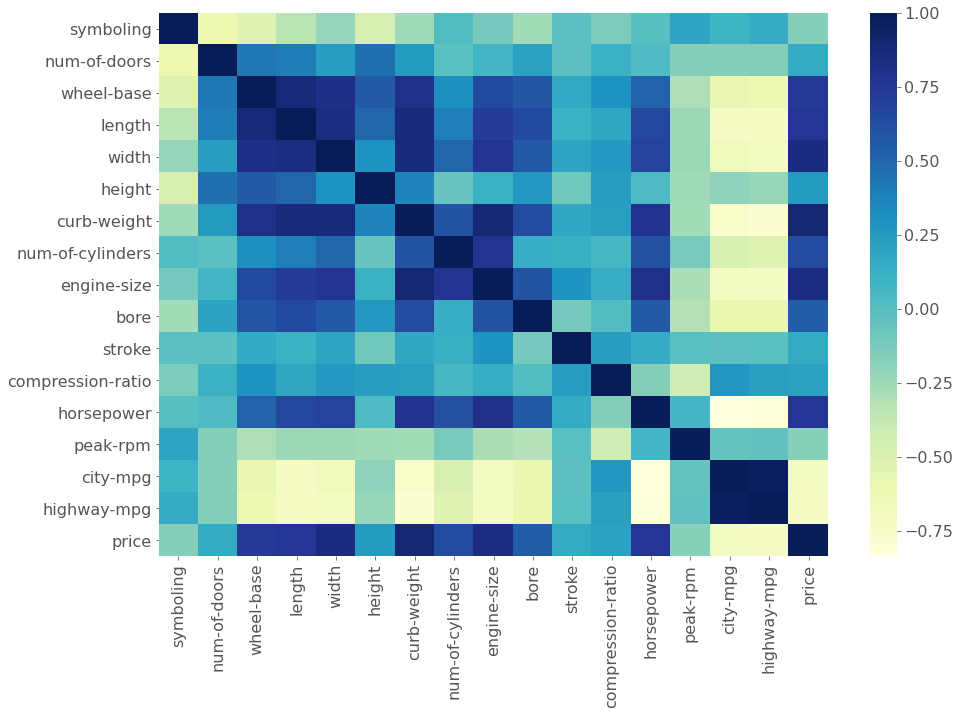

In [44]:
plt.figure(figsize = (15,10))
sns.heatmap(automobile.corr(),annot =False, cmap='YlGnBu');

# Price estimation
the price of a car depends on three major factors.

First, the brand (make).

Second, the performance (engine, horsepower).

Third, the car features(curb weight).

Lets check our estimation through visual representation.

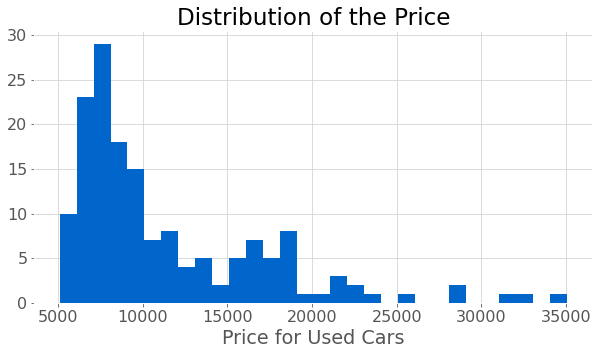

In [45]:
# automobile.groupby('make').mean().round(2).T
fig, ax=plt.subplots()
ax.hist(automobile.price, color='#0066cc', bins=30)
ax.set_title('Distribution of the Price')
ax.set_xlabel("Price for Used Cars");


# Findings:
-The avarage car pirce is between 5000 ans 35000.

/Users/marwahfaraj/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: UserWarning: FixedFormatter should only be used together with FixedLocator


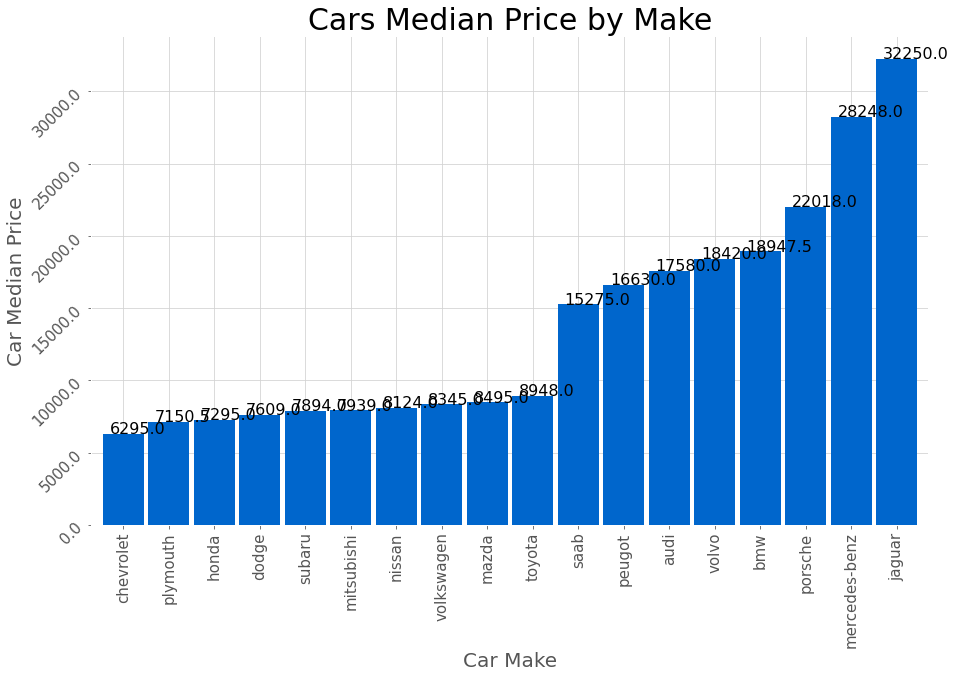

In [46]:
# automobile['grouped_price']=automobile.groupby('price')
# # for price in automobile['price']:
# #     if price>=0 and price<=1200:
# #         automobile['grouped_price']='low'
# #     elif price>=12001 and price<=2400:
# #         automobile['grouped_price']='med'
# #     else:
# #         automobile['grouped_price']='high'

# automobile.head(10)
        

# plt.rcParams['figure.figsize']=(23,10)
# ax = sns.boxplot(x="make", y="price", data=automobile, palette='YlGnBu')
# ax.set_xticklabels(ax.get_xticklabels(),rotation=30);

fig, ax=plt.subplots(figsize=(15,9))
ax=automobile.groupby('make').price.median().sort_values().plot.bar(width=0.9, color='#0066cc', align='center', zorder=3)
for p in ax.patches:
    ax.annotate(format(p.get_height()), (p.get_x()+0.15, p.get_height()+1))
plt.xlabel('Car Make',fontsize=20)
plt.ylabel('Car Median Price',fontsize=20)
plt.title('Cars Median Price by Make',fontsize=30)
ax.tick_params(labelsize=15)
# ax.set_xticklabels(ax.get_xticks(), rotation = 45)
ax.set_yticklabels(ax.get_yticks(), rotation = 45)
plt.show();

# Findings:
    ○ The most expensive car is manufactured by Jaquar and the least expensive is Chevrolet
    ○ The premium cars costing more than 20000 are BMW, Mercedes benz and Porsche
    ○ Less expensive cars costing less than 10000 are Chevrolet, Dodge, Honda, Mitsubishi, Plymoth and Subaru
    ○ Rest of the cars are in the midrange between 10000 and 20000 which has the highest number of cars

# How many cars each Manufacterer has

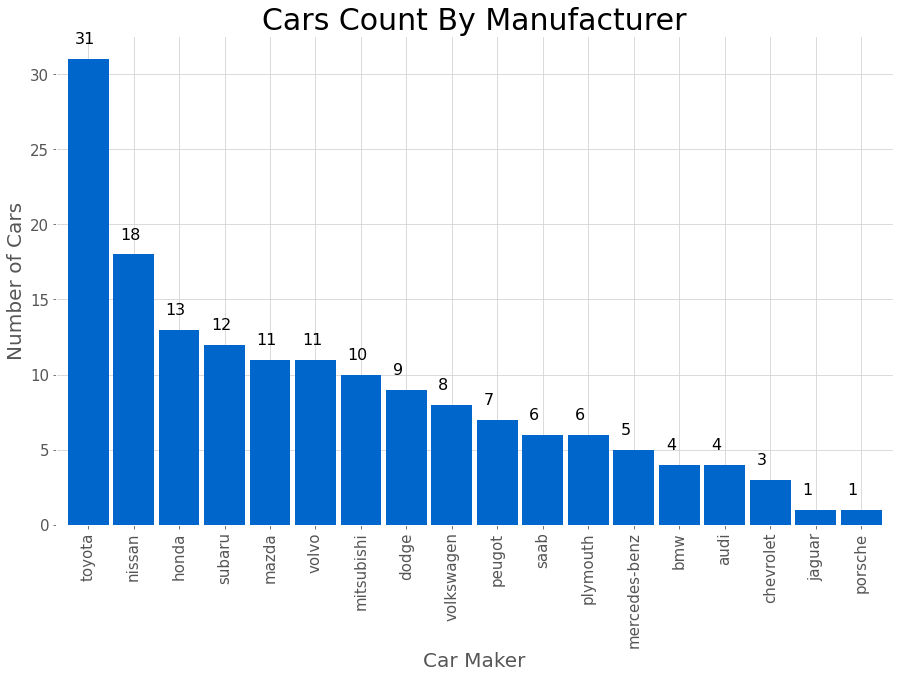

In [47]:
fig, ax=plt.subplots(figsize=(15,9))
ax=automobile['make'].value_counts().plot.bar(width=0.9, color='#0066cc', align='center', zorder=3)
for p in ax.patches:
    ax.annotate(format(p.get_height()), (p.get_x()+0.15, p.get_height()+1))
plt.xticks(rotation='vertical')
plt.xlabel('Car Maker',fontsize=20)
plt.ylabel('Number of Cars',fontsize=20)
plt.title('Cars Count By Manufacturer',fontsize=30)
ax.tick_params(labelsize=15)
#plt.yticks(rotation='vertical')
plt.show()


# Findings:
Toyota is the Brand which has the majority of the cars in the dataset.

# Showing how many Japanese cars in the dataset in comparision to the total number of cars

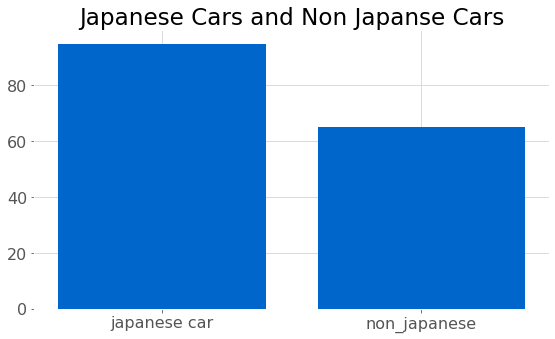

In [48]:
# the japanese car are Toyota, Honda, Nissan, Mazda, Mitsubishi, Subaru, Isuzu.
japanese_car=(automobile.loc[automobile.make == 'toyota', 'make'].count() +\
  automobile.loc[automobile.make == 'nissan','make'].count() +\
automobile.loc[automobile.make == 'mazda', 'make'].count() +\
automobile.loc[automobile.make == 'honda', 'make'].count() +\
    automobile.loc[automobile.make == 'mitsubishi', 'make'].count() +\
automobile.loc[automobile.make == 'subaru', 'make'].count() +\
    automobile.loc[automobile.make == 'isuzu','make'].count())
non_japanese=len(automobile.make)- japanese_car
fig, ax=plt.subplots(figsize=(8, 5))
width=0.9
x=['japanese car','non_japanese']
y=[95, 65]
ax.bar(x,y,color='#0066cc')
plt.title('Japanese Cars and Non Japanse Cars')
plt.tight_layout();

# Findings:
There are more Japanese Cars in the Dataset followed by European.
Toyota,Nissan,Mazda and Honda are all Japanese car makers,This is due customers prefered smaller and more fuel efficient cars made by the japanese car makers.

# Zooming into the correlation between the Price and Symboling, Horsepower, curb weight, and Engine size.

# 

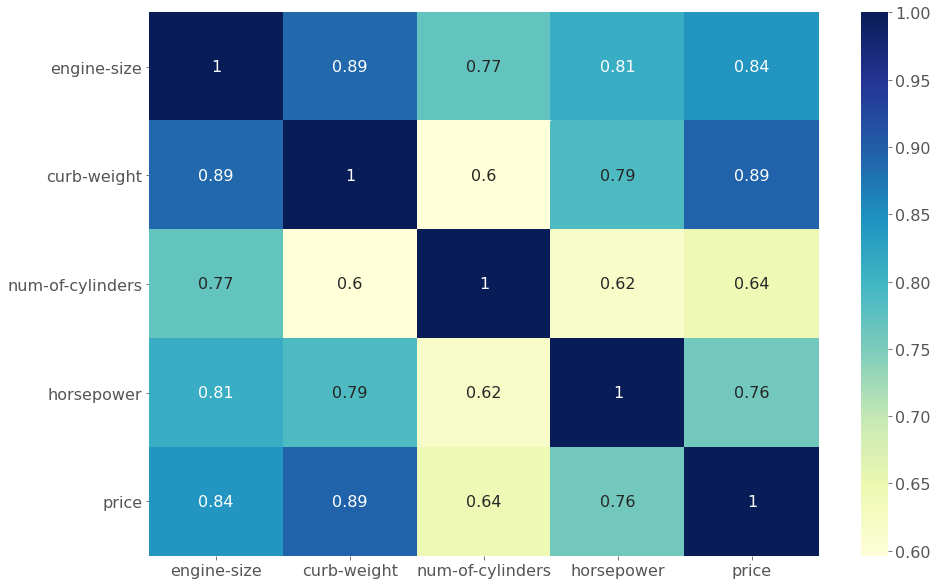

In [49]:
plt.figure(figsize = (15,10))
sns.heatmap(automobile[['engine-size','curb-weight','num-of-cylinders','horsepower','price']].corr(),annot = True, cmap='YlGnBu');

# Findings:

-The price is directly correlated with the engine size, curb-weight, num-of-cylinders and horsepower.


# 

KeyError: 'normalized-losses'

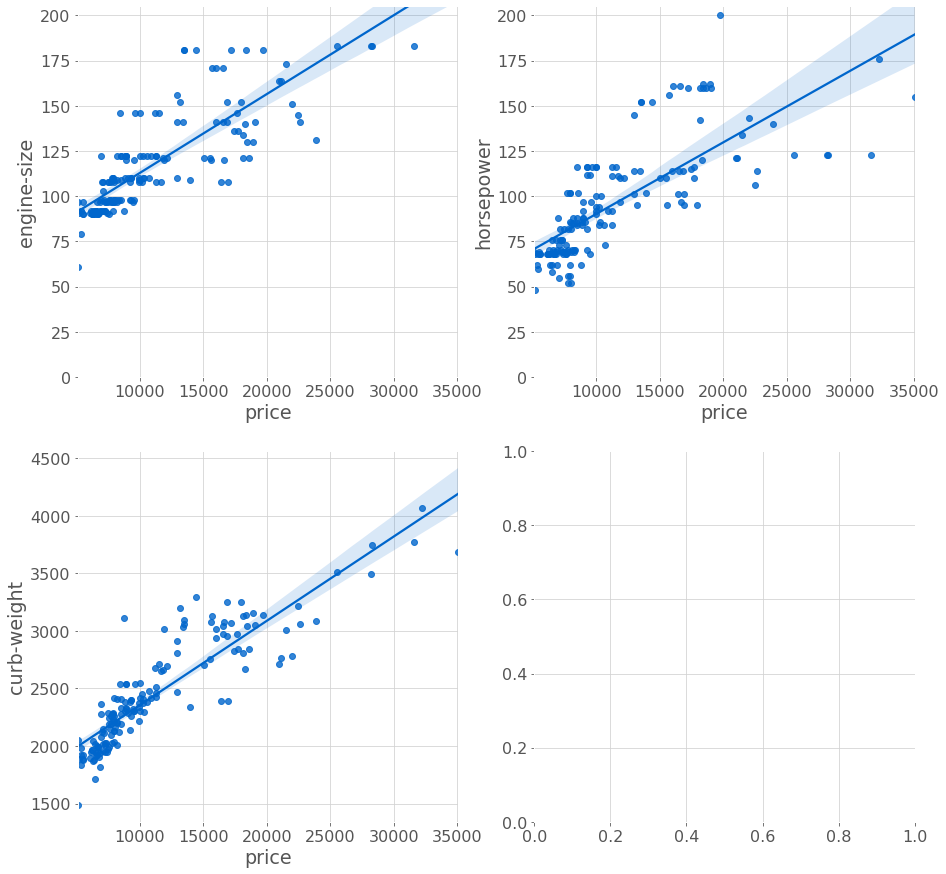

In [51]:

fig, axs = plt.subplots(figsize=(15,15),ncols=2, nrows= 2)
engine_size=sns.regplot(x='price', y='engine-size', ci=95, color='#0066cc', data=automobile, ax=axs[0][0])
engine_size.set(ylim=(0,205))
horse_power=sns.regplot(x='price', y='horsepower',ci=95, color='#0066cc', data=automobile, ax=axs[0][1])
horse_power.set(ylim=(0,205))
symboling=sns.regplot(x='price',y='curb-weight',ci=95, color='#0066cc', data=automobile, ax=axs[1][0])

highway_mpg=sns.regplot(x='price',y='normalized-losses', ci=95, color='#0066cc', data=automobile, ax=axs[1][1])

plt.tight_layout()
plt.show();



# Findings:
- “normalized-losses” is the relative average loss payment per insured vehicle year. This value is normalized for all autos within a particular size classification (two-door, small, station wagons, sports/specialty, etc…), and represents the average loss per car per year, in the chart above this feture is not estimate the price because they are week correlation between them.
-This the best fit line along with showing the 95% confidence interval.

# 

# 

In [52]:
automobile['drive-wheels'].value_counts()

fwd    106
rwd     46
4wd      8
Name: drive-wheels, dtype: int64

# Boxplot of Drive wheels and Price

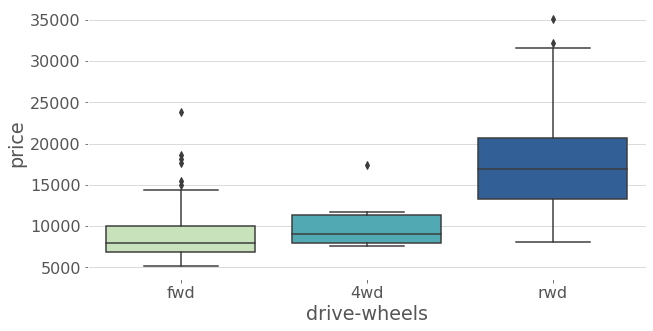

In [53]:
plt.rcParams['figure.figsize']=(10,5)
ax = sns.boxplot(x="drive-wheels", y="price", data=automobile, palette='YlGnBu')


# Findings: 
the car has 3 diffrient drive wheel types which they are fwd, 4wd, and rwd. It's very evident that the Real wheel drive cars are most expensive and front wheel is least expensive cars. Four wheel drive cars are little higher than the front wheel drive cars. There is very less number of four wheel drive cars in our dataset so this picture might not be very accurate.# 

# 

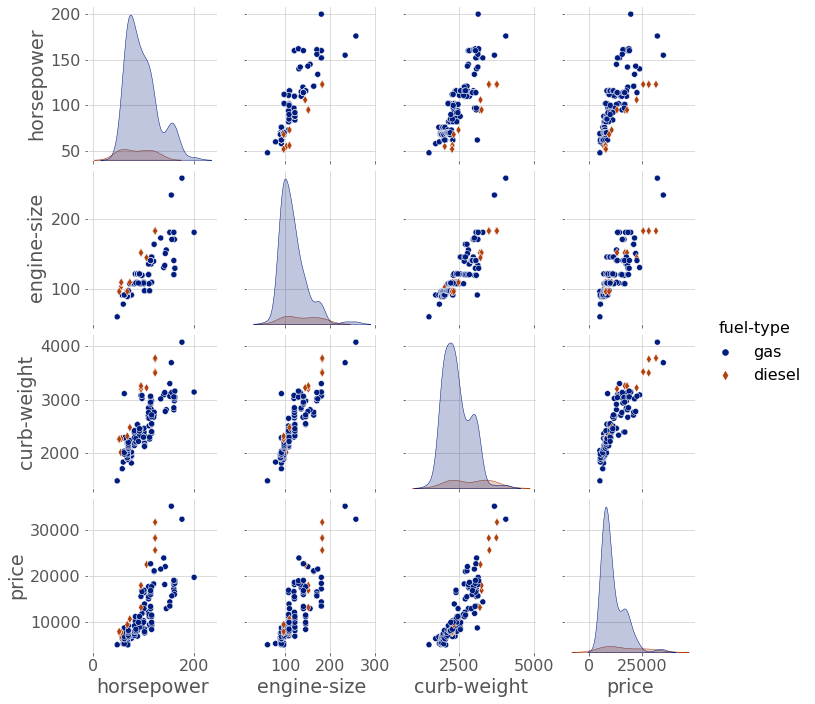

In [54]:
g = sns.pairplot(automobile[["horsepower", "engine-size", "curb-weight","price", "fuel-type"]],
                 hue="fuel-type", palette='dark', markers=['o', 'd'])

# Findings:
- The price increses when the horsepwoer increse when the fuel type is either gas od diesel.
- The price increses when the enigin size increse when the fuel type it either gas or diesel.
- The price increses more along with the curb weight increse when the fuel type is diesel.

#Hypothese testing

H0=mu for the symboling of the expensive car = mu of the symboling of cheap car

Ha=mu for the symboling of the expensive car  not= mu of the symboling of cheap car

alpha=0.05

In [106]:
#the Costs for full-size cars stayed even with 1985 levels at $6,298.
bins = [0,6298,np.inf]
names = ['low_price','expensive_car']

automobile['price_range'] = pd.cut(automobile.price, bins, labels=names)

# automobile.reset_index(inplace=True)
# automobile.drop('index', axis=1, inplace=True)
low_price = automobile[automobile['price_range'] == 'low_price']['symboling']
high_price=automobile[automobile['price_range'] == 'expensive_car']['symboling']

res=stats.mannwhitneyu(low_price,high_price, alternative="two-sided")
res


MannwhitneyuResult(statistic=1377.0, pvalue=0.027185347329974397)

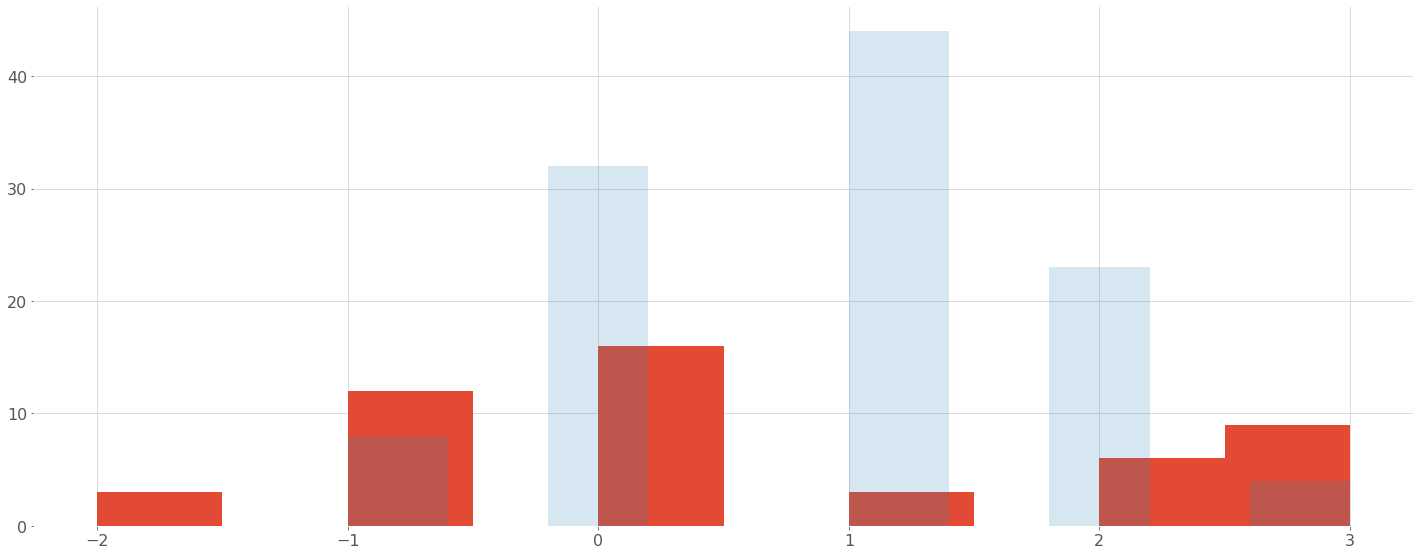

In [93]:
plt.hist(high_price)
plt.hist(low_price, alpha=0.2)
plt.tight_layout();

In [83]:
def generate_distribution_histogram(dataframe, 
                                    column_name, 
                                    title, x_axis_label, y_axis_label,
                                    label_name,
                                    number_bins = 15):
    """
    This function generates a histogram.
    Args:
        dataframe:
        column_name: String. Name of the column whose distribution we
        want to visualize.
        title: String. Title of the histogram.
        x_axis_label: String. X-axis label.
        y_axis_label: String. Y-axis label.
    Outputs:
        Histogram containing distribution for specific column column_name.
    """
    plt.hist(dataframe[column_name], bins = number_bins, label = label_name)
    plt.title(title)
    plt.xlabel(x_axis_label)
    plt.ylabel=yticks()
    yticks=[-3,-2,-1,0,1,2,3]
    plt.legend(loc='upper right')

generate_distribution_histogram(automobile['price'], 'high_price',
                                title = 'How Price safety',
                                x_axis_label = 'symbolying',
                                y_axis_label = 'high_price',
                                label_name = '>=$17500K')
# #Plot the histogram for the distribution for data >$50K
# generate_distribution_histogram(df_greater_than_50k, 'age',
#                                 title = 'Age Distribution: US Population',
#                                 x_axis_label = 'Age (years)',
#                                 y_axis_label = 'Frequency',
#                                 label_name = '>$50K')

KeyError: 'high_price'

In [56]:
automobile.head(10)

,symboling,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,...,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,price_range
0,2,audi,gas,std,4,sedan,fwd,front,99.8,176.6,...,mpfi,3.19,3.40,10.0,102.0,5500.0,24,30,13950.0,low_price
1,2,audi,gas,std,4,sedan,4wd,front,99.4,176.6,...,mpfi,3.19,3.40,8.0,115.0,5500.0,18,22,17450.0,low_price
2,1,audi,gas,std,4,sedan,fwd,front,105.8,192.7,...,mpfi,3.19,3.40,8.5,110.0,5500.0,19,25,17710.0,expensive_car
3,1,audi,gas,turbo,4,sedan,fwd,front,105.8,192.7,...,mpfi,3.13,3.40,8.3,140.0,5500.0,17,20,23875.0,expensive_car
4,2,bmw,gas,std,2,sedan,rwd,front,101.2,176.8,...,mpfi,3.50,2.80,8.8,101.0,5800.0,23,29,16430.0,low_price
5,0,bmw,gas,std,4,sedan,rwd,front,101.2,176.8,...,mpfi,3.50,2.80,8.8,101.0,5800.0,23,29,16925.0,low_price
6,0,bmw,gas,std,2,sedan,rwd,front,101.2,176.8,...,mpfi,3.31,3.19,9.0,121.0,4250.0,21,28,20970.0,expensive_car
7,0,bmw,gas,std,4,sedan,rwd,front,101.2,176.8,...,mpfi,3.31,3.19,9.0,121.0,4250.0,21,28,21105.0,expensive_car
8,2,chevrolet,gas,std,2,hatchback,fwd,front,88.4,141.1,...,2bbl,2.91,3.03,9.5,48.0,5100.0,47,53,5151.0,low_price
9,1,chevrolet,gas,std,2,hatchback,fwd,front,94.5,155.9,...,2bbl,3.03,3.11,9.6,70.0,5400.0,38,43,6295.0,low_price


# 

# 

# 

# 

# 

# 

# Conclusion
Analysis of the data set provides:

1-How the data set are distributed.

2-Correlation between different fields and how they are related.

3-How many cars for each manufacturer in the dataset.

4-Price : Factors affecting Price of the Automobile like symboling, horsepwoer,  engin size, amd highway_mpg.

5-Importance of drive wheels and curb weight

# 